In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!nvidia-smi

Fri Dec 16 21:43:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Preparations

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_3'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_3
histogram.txt  lab3_ex3  lab3_ex3.cu


### Compiling

In [4]:
!nvcc -arch=sm_75 ./lab3_ex3.cu -o lab3_ex3

### Executing

In [5]:
!nvprof ./lab3_ex3 262144

Chosen input problem length: 262144
==1552== NVPROF is profiling process 1552, command: ./lab3_ex3 262144
CPU & GPU results are equal.
==1552== Profiling application: ./lab3_ex3 262144
==1552== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   74.58%  295.01us         1  295.01us  295.01us  295.01us  histogram_kernel(unsigned int*, unsigned int*, unsigned int, unsigned int)
                   22.25%  88.031us         1  88.031us  88.031us  88.031us  [CUDA memcpy HtoD]
                    1.29%  5.1200us         1  5.1200us  5.1200us  5.1200us  [CUDA memset]
                    1.08%  4.2880us         1  4.2880us  4.2880us  4.2880us  convert_kernel(unsigned int*, unsigned int)
                    0.79%  3.1360us         1  3.1360us  3.1360us  3.1360us  [CUDA memcpy DtoH]
      API calls:   99.56%  397.71ms         2  198.86ms  7.3950us  397.70ms  cudaMalloc
                    0.16%  657.34us         2  328.67us  307.4

# Profiling

In [6]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex3 1024

Chosen input problem length: 1024
==PROF== Connected to process 1573 (/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_3/lab3_ex3)
==PROF== Profiling "histogram_kernel" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
CPU & GPU results are equal.
==PROF== Disconnected from process 1573
[1573] lab3_ex3@127.0.0.1
  histogram_kernel(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-16 21:43:13, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.93
    SM Frequency                                                             cycle/usecond                         576.79
    Elapsed Cycles                                                                   cycle                

In [7]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex3 262144

Chosen input problem length: 262144
==PROF== Connected to process 1593 (/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw3/ex_3/lab3_ex3)
==PROF== Profiling "histogram_kernel" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
CPU & GPU results are equal.
==PROF== Disconnected from process 1593
[1593] lab3_ex3@127.0.0.1
  histogram_kernel(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-16 21:43:17, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.93
    SM Frequency                                                             cycle/usecond                         577.80
    Elapsed Cycles                                                                   cycle              

# Plotting

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

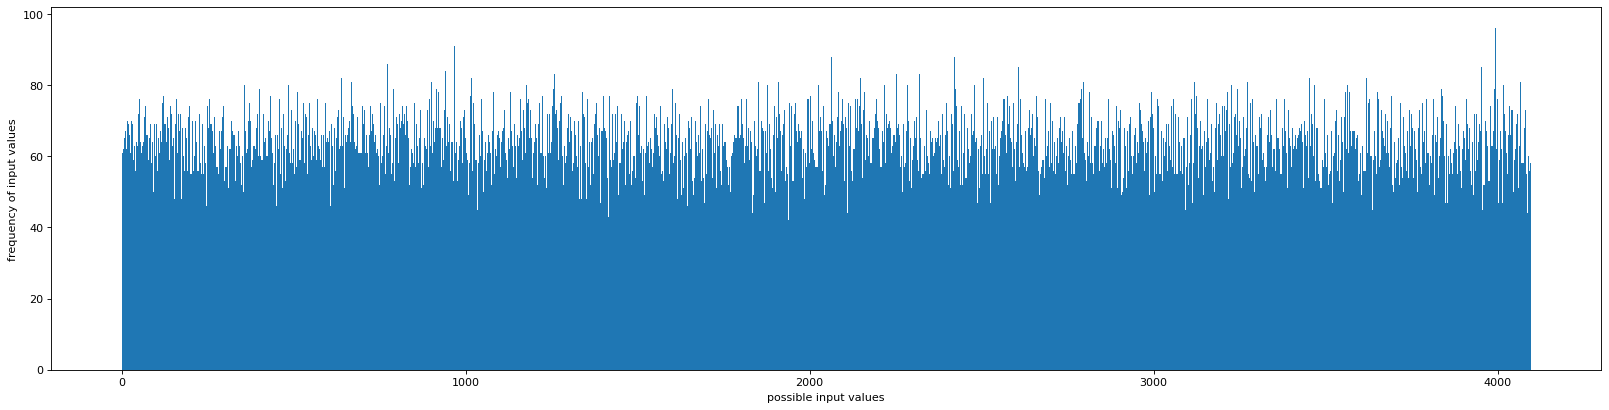

In [9]:
with open('histogram.txt') as file:
    histogram = [int(line.rstrip()) for line in file]

figure(figsize=(25, 6), dpi=80)

bins = list(range(1,len(histogram)+1))
plt.bar(bins, histogram, width = 1.0)
plt.xlabel('possible input values')
plt.ylabel('frequency of input values')
plt.show()